# Analysis of the winter barley data (all stations)

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()
df = pd.read_csv(os.path.join(p_cwd, "data","barley_data","winterbarley.csv"))

In [3]:
df.head()

,s_id,lon,lat,alt,phase_id,year,day_year
0,618,10.73330,52.7333,85,2,1951,65
1,2865,8.73333,49.3000,170,2,1951,71
2,1810,8.93333,49.9667,130,2,1951,79
3,3414,11.36670,47.9000,670,2,1951,79
4,1416,7.30000,51.9667,110,2,1951,82


In [4]:
df.dtypes

s_id          int64
lon         float64
lat         float64
alt           int64
phase_id      int64
year          int64
day_year      int64
dtype: object

In [5]:
df['s_id']=df['s_id'].astype("category")

In [6]:
df['phase_id']=df['phase_id'].astype("category")

In [7]:
df['phase_id'].unique().tolist()

[2, 3, 0, 1, 5, 4]

In [8]:
df.dtypes

s_id        category
lon          float64
lat          float64
alt            int64
phase_id    category
year           int64
day_year       int64
dtype: object

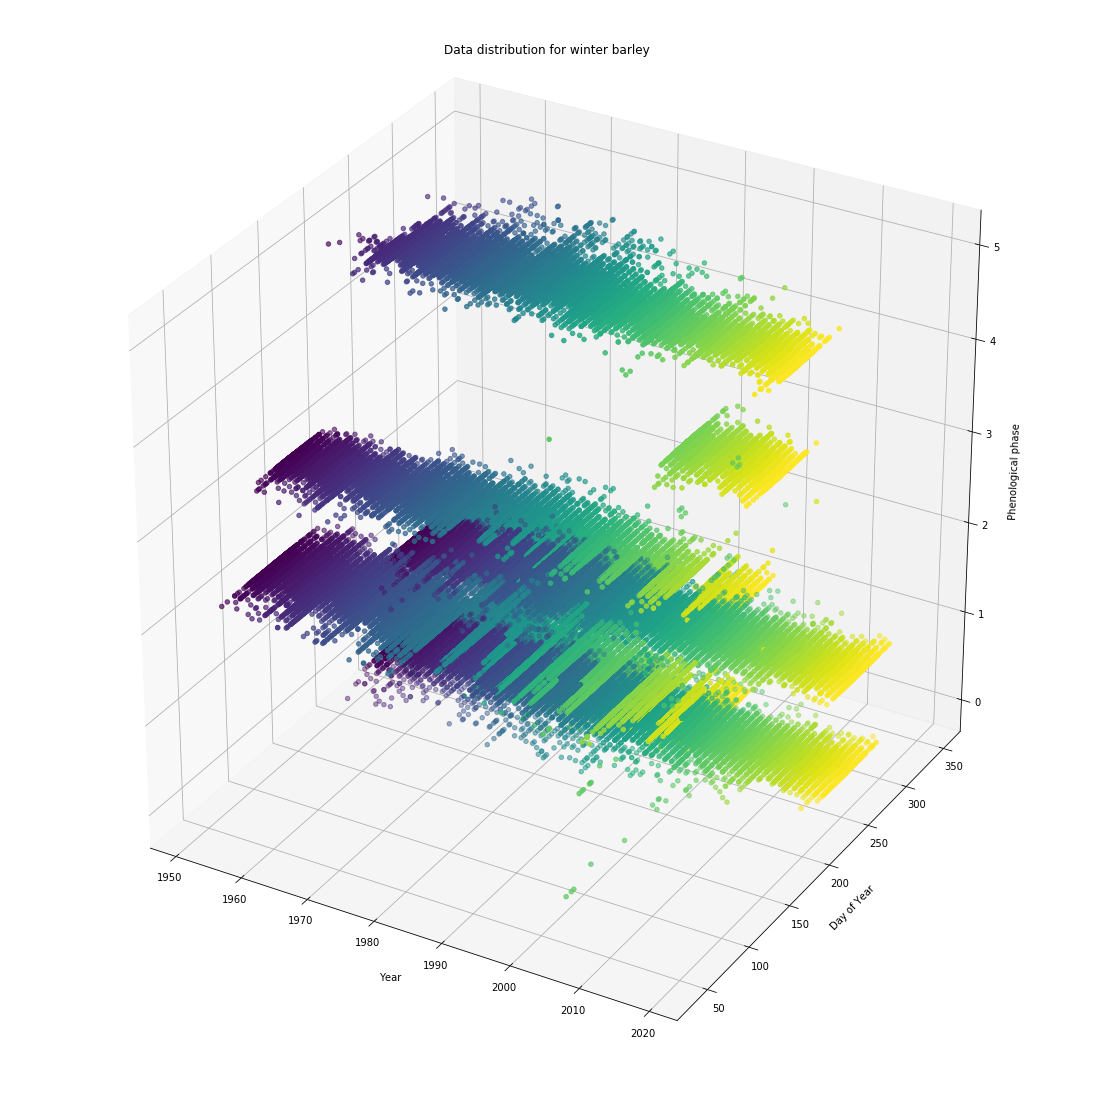

In [9]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df['year']
ys = df['day_year']
zs =df['phase_id']
ax.scatter(xs, ys, zs, c=df['year'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Phenological phase', labelpad=10)

plt.title("Data distribution for winter barley", pad=40)
plt.show()

In [10]:
fig.savefig(os.path.join(p_cwd, "output","images","winterbarley_plot.jpg"), dpi=300,
        orientation='portrait')

In [11]:
columns = df.columns.tolist()
columns

['s_id', 'lon', 'lat', 'alt', 'phase_id', 'year', 'day_year']

In [12]:
r_col = ['s_id', 'year','phase_id', 'day_year', 'lon', 'lat', 'alt'] #shifting the columns order

In [13]:
df = df[r_col]

In [14]:
df

,s_id,year,phase_id,day_year,lon,lat,alt
0,618,1951,2,65,10.73330,52.7333,85
1,2865,1951,2,71,8.73333,49.3000,170
2,1810,1951,2,79,8.93333,49.9667,130
3,3414,1951,2,79,11.36670,47.9000,670
4,1416,1951,2,82,7.30000,51.9667,110
...,...,...,...,...,...,...,...
400726,2692,1963,0,241,9.30000,48.7333,240
400727,2601,1963,0,242,8.21667,49.1500,130
400728,3950,1963,0,242,10.95000,49.3667,380
400729,1150,1963,5,244,7.06667,51.2333,220


## Analysis of the harvest phenological data (phase:100(5))

In [15]:
df_harvest = df[df['phase_id']==5]

In [16]:
df_harvest.drop(['phase_id'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_harvest.head()

,s_id,year,day_year,lon,lat,alt
3129,1802,1952,183,8.56667,49.8000,90
5342,1802,1953,188,8.56667,49.8000,90
9133,2751,1988,162,9.13333,49.0000,200
9140,2293,1988,165,7.18333,50.6000,110
9146,808,1988,168,9.48333,53.5167,25


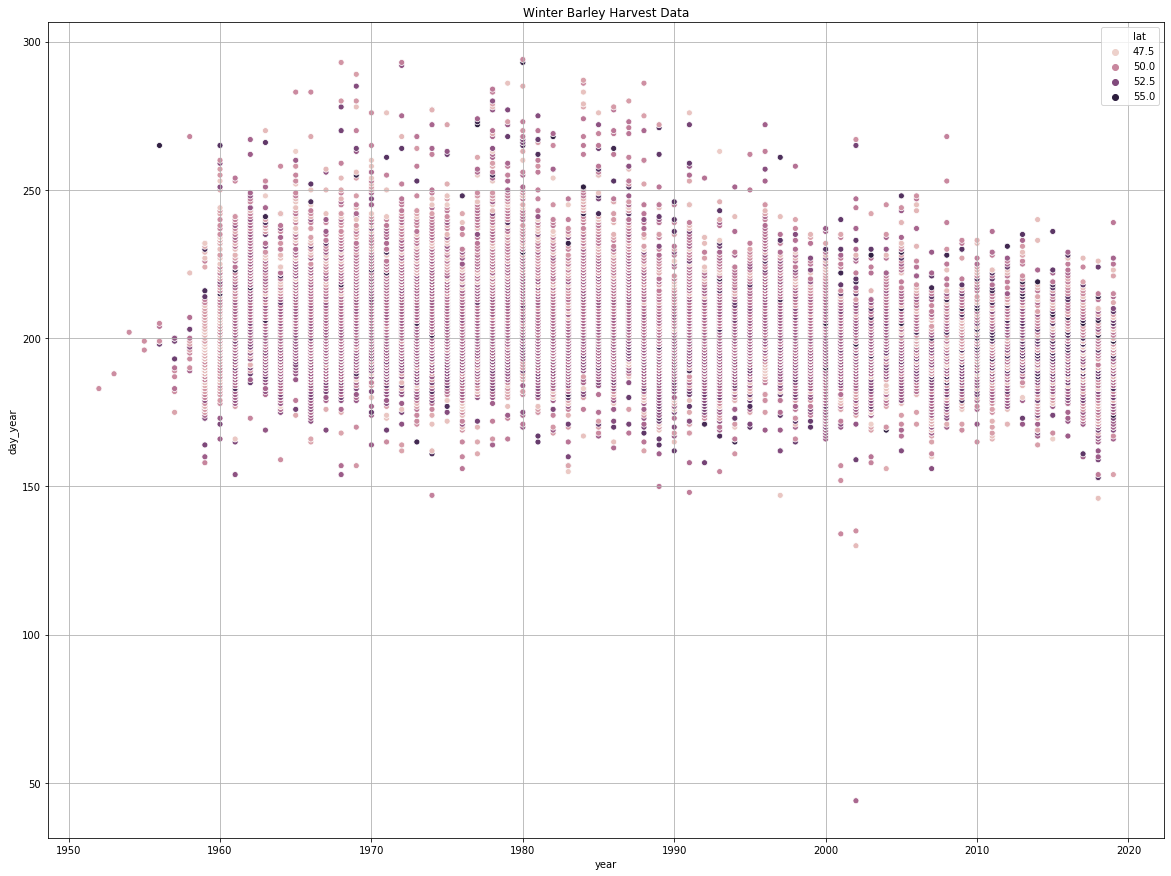

In [18]:
fig = plt.figure(figsize=(20,15))
plt.title("Winter Barley Harvest Data")
plt.grid()
sns.scatterplot(x=df_harvest['year'],y=df_harvest['day_year'], hue=df['lat']);

In [19]:
fig.savefig(os.path.join(p_cwd, "output","images","winterbarley_harvest.jpg"), dpi=300,
        orientation='portrait')

In [20]:
X=df_harvest.drop(['s_id','day_year'], axis=1)
X=np.array(X)
X

array([[1952.     ,    8.56667,   49.8    ,   90.     ],
       [1953.     ,    8.56667,   49.8    ,   90.     ],
       [1988.     ,    9.13333,   49.     ,  200.     ],
       ...,
       [1963.     ,   12.2667 ,   49.2    ,  350.     ],
       [1963.     ,    9.21667,   54.35   ,   10.     ],
       [1963.     ,    7.06667,   51.2333 ,  220.     ]])

In [21]:
y=np.array(df_harvest['day_year'])
y

array([183, 188, 162, ..., 240, 241, 244])

In [22]:
regr = LinearRegression().fit(X, y)

In [23]:
round(regr.score(X,y),3)

0.24

In [24]:
regr.coef_.round(3)

array([-0.238, -1.232,  3.643,  0.047])

In [25]:
mu = np.mean(y)
mu

199.94944851918217

In [26]:
sample=df_harvest[df_harvest['year']>=2000]['day_year'].to_list()
sample_mean=np.mean(np.array(sample))
sample_mean

193.2464010134746

In [27]:
sample_sd = np.std(np.array(sample))
sample_sd 

10.17632367968557

In [28]:
sigma = np.std(y)
sigma

12.067230521400177

In [29]:
z_stat = (sample_mean-mu)/(sigma/np.sqrt(np.size(np.array(sample))))

In [30]:
z_stat 

-73.20059084055795

Significant at alpha=0.1 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

In [31]:
# With Statsmodels

import statsmodels.api as sm
X = df_harvest[['year']]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     6901.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:22:59   Log-Likelihood:            -3.4793e+05
No. Observations:               89849   AIC:                         6.959e+05
Df Residuals:                   89847   BIC:                         6.959e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        630.0578      5.178    121.686      0.000     619.909     640.206
year          -0.2166      0.003    -83.071      0.000      -0.222      -0.212
==============================================================================
Omnibus:                    16412.522   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54473.754
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       6.337   Cond. No.                     2.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
robust = sm.OLS(y,X).fit().get_robustcov_results(cov_type='HAC', maxlags=10)
robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     729.5
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.02e-160
Time:                        12:22:59   Log-Likelihood:            -3.4793e+05
No. Observations:               89849   AIC:                         6.959e+05
Df Residuals:                   89847   BIC:                         6.959e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        630.0578     15.945     39.515      0.000     598.807     661.309
year          -0.2166      0.008    -27.009      0.000      -0.232      -0.201
==============================================================================
Omnibus:                    16412.522   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54473.754
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       6.337   Cond. No.                     2.65e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 10 lags and without small sample correction
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
a = robust.params
print(a[0])
print(a[1])

630.0577807636814
-0.21661243692327958


In [36]:
model2 = sm.GLSAR(y, X, rho=2)
res = model2.iterative_fit(maxiter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                          GLSAR   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          9.68e-231
Time:                        12:23:07   Log-Likelihood:            -2.1743e+05
No. Observations:               89847   AIC:                         4.349e+05
Df Residuals:                   89845   BIC:                         4.349e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1270.3682     32.910     38.601      0.000    1205.865    1334.871
year          -0.5391      0.017    -32.527      0.000      -0.572      -0.507
==============================================================================
Omnibus:                   249910.460   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9309535577.026
Skew:                         -36.149   Prob(JB):                         0.00
Kurtosis:                    1578.292   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
a_glsar = res.params
a_glsar

const    1270.368179
year       -0.539069
dtype: float64

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

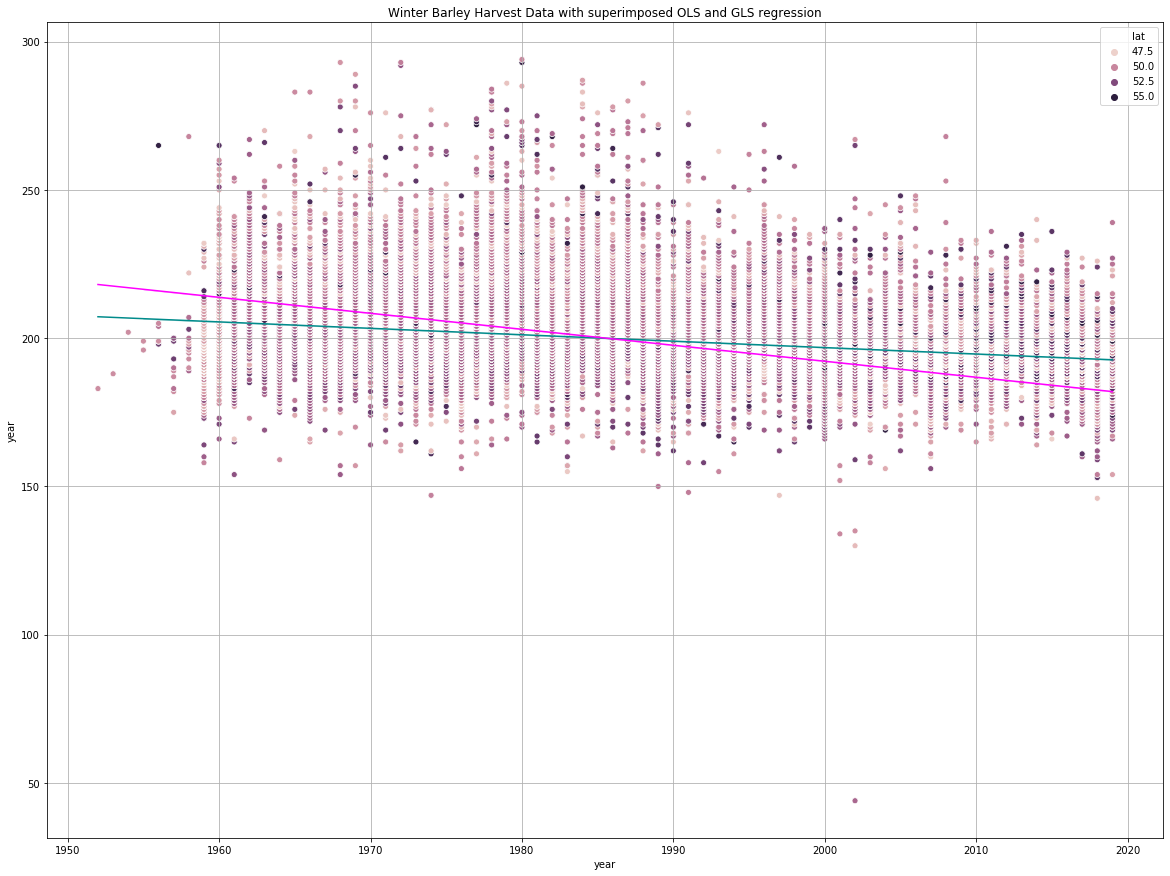

In [74]:
fig = plt.figure(figsize=(20,15))
plt.title("Winter Barley Harvest Data with superimposed OLS and GLS regression")
plt.grid()
sns.scatterplot(x=df_harvest['year'],y=df_harvest['day_year'], hue=df['lat']);
sns.lineplot(x=df_harvest['year'],y=a[0]+a[1]*df_harvest['year'], c='darkcyan');
sns.lineplot(x=df_harvest['year'],y=a_glsar[0]+a_glsar[1]*df_harvest['year'], c='fuchsia');

In [56]:
lst_years = sorted(df_harvest['year'].unique().tolist())
numbers = [i for i in range (1,69,1)]
years_dict = dict(zip(lst_years,numbers))
df_test = df_harvest.replace({'year':years_dict})
df_test

,s_id,year,day_year,lon,lat,alt
3129,1802,1,183,8.56667,49.8000,90
5342,1802,2,188,8.56667,49.8000,90
9133,2751,37,162,9.13333,49.0000,200
9140,2293,37,165,7.18333,50.6000,110
9146,808,37,168,9.48333,53.5167,25
...,...,...,...,...,...,...
400718,1092,12,239,7.98333,53.6667,2
400723,3412,12,240,11.41670,47.8333,600
400724,3657,12,240,12.26670,49.2000,350
400725,228,12,241,9.21667,54.3500,10


In [71]:
X_test = df_test['year']
y_test=np.array(df_test['day_year'])
X_test = sm.add_constant(X_test)
model_test = sm.OLS(y_test,X_test).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     6901.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:06:22   Log-Likelihood:            -3.4793e+05
No. Observations:               89849   AIC:                         6.959e+05
Df Residuals:                   89847   BIC:                         6.959e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.4469      0.098   2111.658      0.000     207.254     207.639
year          -0.2166      0.003    -83.071      0.000      -0.222      -0.212
==============================================================================
Omnibus:                    16412.522   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54473.754
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                       6.337   Cond. No.                         95.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model2ts = sm.GLSAR(y_test, X_test, rho=2)
rests = model2ts.iterative_fit(maxiter=100)
rests.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                          GLSAR   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          9.68e-231
Time:                        13:06:25   Log-Likelihood:            -2.1743e+05
No. Observations:               89847   AIC:                         4.349e+05
Df Residuals:                   89845   BIC:                         4.349e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.6441      0.715    305.618      0.000     217.242     220.046
year          -0.5391      0.017    -32.527      0.000      -0.572      -0.507
==============================================================================
Omnibus:                   249910.460   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       9309535577.027
Skew:                         -36.149   Prob(JB):                         0.00
Kurtosis:                    1578.292   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Creating a time series with the data and extracting the trend

In [61]:
df_comp= pd.DataFrame(df_harvest.groupby(by=['year']).agg({'day_year': ['mean','median']}))
df_comp

day_year       
            mean median
year                   
1952  183.000000  183.0
1953  188.000000  188.0
1954  202.000000  202.0
1955  197.500000  197.5
1956  211.666667  201.5
...          ...    ...
2015  192.449602  192.0
2016  192.441595  191.0
2017  190.750365  189.0
2018  182.701674  182.0
2019  188.276498  186.0

[68 rows x 2 columns]

In [62]:
df_comp.columns

MultiIndex([('day_year',   'mean'),
            ('day_year', 'median')],
           )

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

Text(0.5, 1.0, 'Mean and Median of the First Day of Harvest')

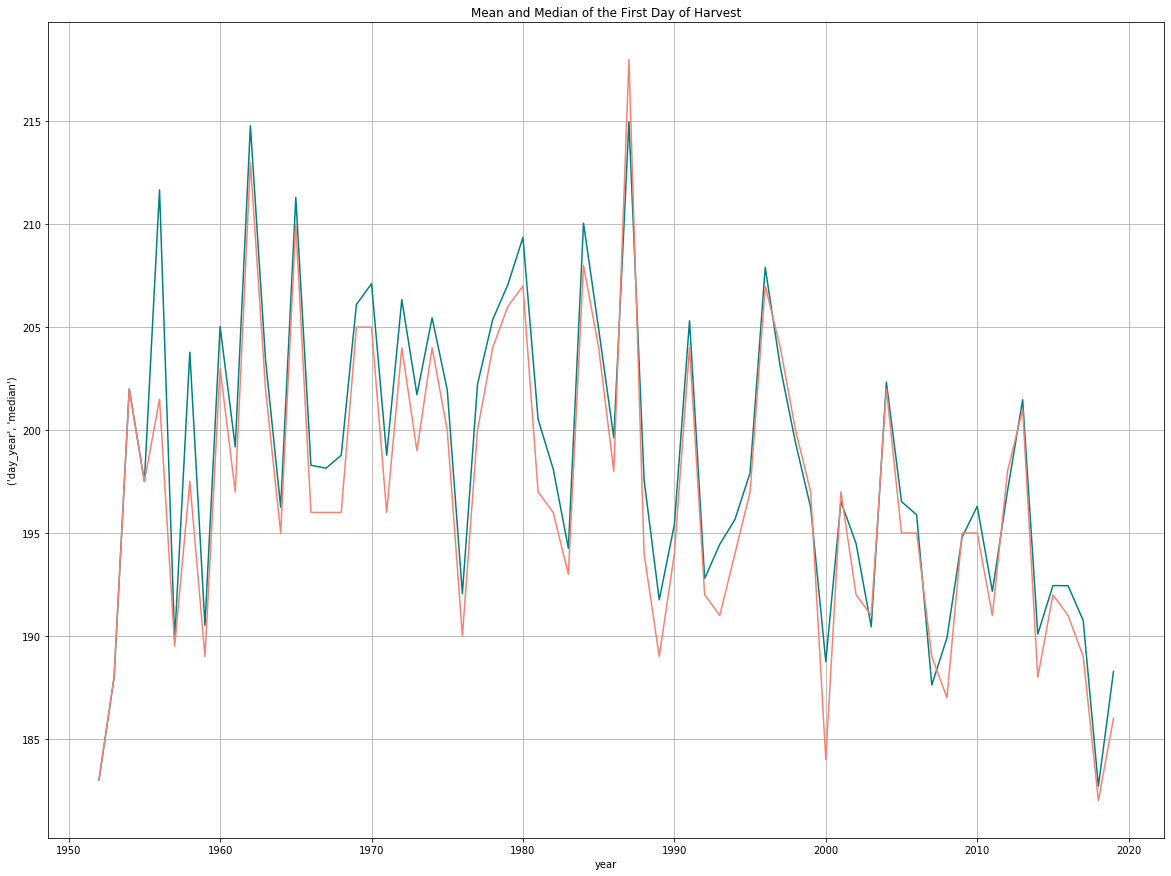

In [63]:
plt.figure(figsize=(20,15))
plt.grid()
sns.lineplot(x=df_comp.index,y=df_comp[('day_year',   'mean')], c='teal')
sns.lineplot(x=df_comp.index,y=df_comp[('day_year',   'median')], c='salmon')
plt.title("Mean and Median of the First Day of Harvest")

In [64]:
df_ts = df_comp.drop([('day_year',   'mean')], axis=1)

In [65]:
df_ts

,day_year
,median
year,
1952,183.0
1953,188.0
1954,202.0
1955,197.5
1956,201.5
...,...
2015,192.0
2016,191.0


In [66]:
df_ts['rolling']=df_ts[('day_year', 'median')].rolling(10).mean()

In [92]:
mean = df_ts[('day_year', 'median')].mean()
mean

196.9558823529412

In [67]:
df_ts

,day_year,rolling
,median,
year,,
1952,183.0,NaN
1953,188.0,NaN
1954,202.0,NaN
1955,197.5,NaN
1956,201.5,NaN
...,...,...
2015,192.0,193.1
2016,191.0,192.7


/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/gi

Text(0.5, 1.0, 'Time Series of the First Day of Harvest')

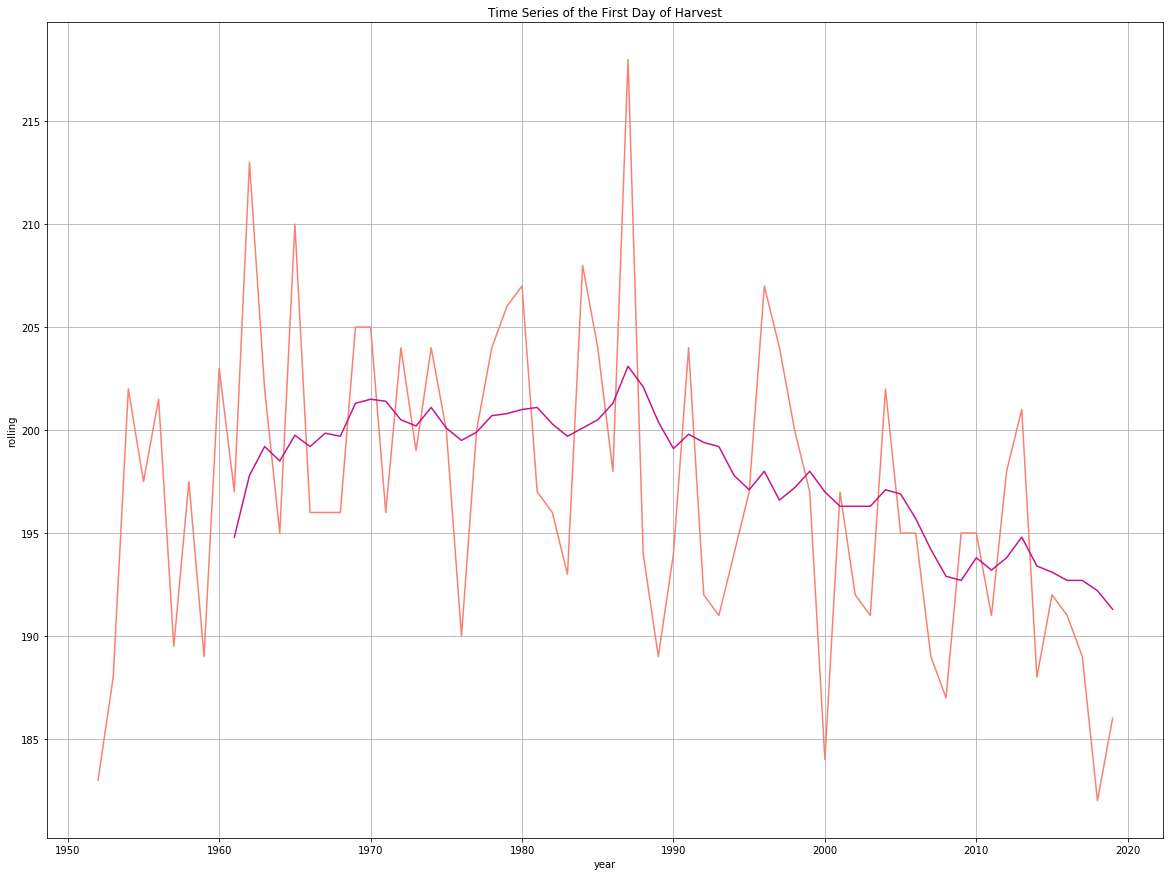

In [68]:
plt.figure(figsize=(20,15))
plt.grid()
sns.lineplot(x=df_ts.index,y=df_ts[('day_year',   'median')], c='salmon')
sns.lineplot(x=df_ts.index,y=df_ts['rolling'], c= 'mediumvioletred')
plt.title("Time Series of the First Day of Harvest")

In [75]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [104]:
X_ts = df_ts.index
y_ts=df_ts[('day_year', 'median')]
rolling_beta = RollingOLS(y_ts, X_ts, window=10).fit()
rolling_beta.params['x1'].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.09956734768837383,
 0.10104948973913012,
 0.10171181213070105,
 0.10130258017107556,
 0.101889702238948,
 0.10155717083641921,
 0.1018348713180573,
 0.10170582857726834,
 0.10246760493601313,
 0.10251790064631677,
 0.10241363719171101,
 0.10190610360535196,
 0.10170197397393885,
 0.10210700685251906,
 0.10154883805918728,
 0.10119124358842915,
 0.10134229404015586,
 0.10169623647251831,
 0.10169659640617408,
 0.10174766441471134,
 0.10174561484456723,
 0.10128943390952776,
 0.10093395773451351,
 0.1010865963229902,
 0.1012379574333343,
 0.10158884185199461,
 0.10244727234932471,
 0.10189054898347995,
 0.10098161657396683,
 0.10027620234647065,
 0.1005783679221771,
 0.10032508772735921,
 0.10017221188776676,
 0.09941880214046143,
 0.09901795727693292,
 0.09942140609601847,
 0.09867232635641059,
 0.09892383098805614,
 0.09927417746208339,
 0.09872116686256766,
 0.09832207335612048,
 0.0982717731978167,
 0.09822127408027595,
 0.0985

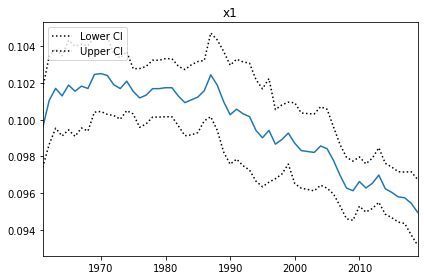

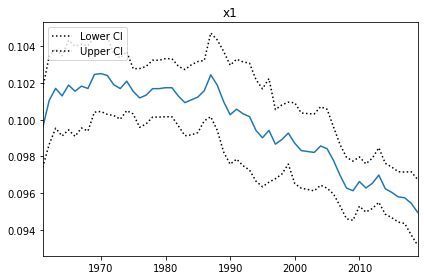

In [87]:
rolling_beta.plot_recursive_coefficient()